# Beaver River diabase and anorthosite, and Greenstone Flow geochemistry data compilation

This notebook is for compiling geochemistry data for the Beaver River diabase and its anorthosite xenoliths in North Shore, MN, and comparing them with the data from the Greenstone Flow in Keweenaw Peninsula and Isle Royale. 

The data is soley taken from the PhD thesis by Doyle (2016). The measurements are all conducted using a JEOL JSM-6490LV scanning electron microscope equipped with an Oxford Inca X-Act energy dispersive X-ray spectrometer (SEM-EDS) at the Research Instrumentation Laboratory at UMD. 

## import software packages

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyrolite.plot import pyroplot
import seaborn as sns
from scipy import stats
from pyrolite.geochem.ind import REE
from pyrolite import geochem
from pyrolite.geochem.norm import get_reference_composition, all_reference_compositions
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

In [2]:
def get_sample_average(df):
    return df[df['Sample'] != 'Average'].reset_index(drop=True)

# load geochem files
cpx_cat = get_sample_average(pd.read_csv('../data/Geochem_compiled/Cpx_cat.csv'))
cpx_chem = get_sample_average(pd.read_csv('../data/Geochem_compiled/Cpx_chem.csv'))
ol_cat = get_sample_average(pd.read_csv('../data/Geochem_compiled/Ol_cat.csv'))
ol_chem = get_sample_average(pd.read_csv('../data/Geochem_compiled/Ol_chem.csv'))
pl_cat = get_sample_average(pd.read_csv('../data/Geochem_compiled/Pl_cat.csv'))
pl_chem = get_sample_average(pd.read_csv('../data/Geochem_compiled/Pl_chem.csv'))
whole_rock_geochem = get_sample_average(pd.read_csv('../data/Geochem_compiled/Whole_rock_geochem.csv'))

In [3]:
cpx_cat.head()

,Sample,CAT SUM,Si,Al,Na,Ca,Cr,Fe,Mg,K,Ti,Mn,Total,Mg#,Location
0,SBI10-CPX-1,2.28,2.00,0.05,0.02,0.65,0.0,0.54,0.67,0.0,0.02,0.01,3.97,55.4,South BBC
1,SBI10-CPX-2,2.24,2.00,0.05,0.02,0.72,0.0,0.38,0.76,0.0,0.03,0.01,3.96,66.6,South BBC
2,SBI10-CPX-3,2.27,2.02,0.04,0.02,0.71,0.0,0.48,0.65,0.0,0.02,0.01,3.95,57.3,South BBC
3,SBI10-CPX-4,2.27,1.99,0.06,0.02,0.68,0.0,0.47,0.71,0.0,0.03,0.01,3.97,60.3,South BBC
4,SBI10-CPX-5,2.25,1.98,0.08,0.02,0.69,0.0,0.41,0.75,0.0,0.03,0.01,3.96,64.7,South BBC


In [4]:
cpx_cat['En'] = cpx_cat['Mg']/(cpx_cat['Mg'] + cpx_cat['Fe'])
cpx_cat['En'] = cpx_cat['En']*100

pl_cat['An'] = pl_cat['Ca']/(pl_cat['Ca']+pl_cat['Na']+pl_cat['K'])
pl_cat['An'] = pl_cat['An']*100

ol_cat['Fo'] = ol_cat['Mg']/(ol_cat['Mg']+ol_cat['Fe'])
ol_cat['Fo'] = ol_cat['Fo']*100

cpx_cat_SBBC = cpx_cat[cpx_cat['Location'] == 'South BBC']
cpx_cat_NBBC = cpx_cat[cpx_cat['Location'] == 'North BBC']
cpx_cat_Keweenaw = cpx_cat[cpx_cat['Location'] == 'Keweenaw']
cpx_cat_IR = cpx_cat[cpx_cat['Location'] == 'Isle Royale']

chondrite = get_reference_composition("Chondrite_SM89")
CI = chondrite.set_units("ppm")

whole_rock_geochem_Ke = whole_rock_geochem[whole_rock_geochem['Location'] == 'Keweenaw']
whole_rock_geochem_IR = whole_rock_geochem[whole_rock_geochem['Location'] == 'Isle Royale']
whole_rock_geochem_BB = whole_rock_geochem[whole_rock_geochem['Location']== 'Beaver Bay']
whole_rock_geochem_SB = whole_rock_geochem[whole_rock_geochem['Location'] == 'Silver Bay']

whole_rock_geochem_Ke = whole_rock_geochem_Ke.pyrochem.REE.pyrochem.normalize_to(CI, units="ppm")
whole_rock_geochem_IR = whole_rock_geochem_IR.pyrochem.REE.pyrochem.normalize_to(CI, units="ppm")
whole_rock_geochem_BB = whole_rock_geochem_BB.pyrochem.REE.pyrochem.normalize_to(CI, units="ppm")
whole_rock_geochem_SB = whole_rock_geochem_SB.pyrochem.REE.pyrochem.normalize_to(CI, units="ppm")

## REE comparison between Beaver River diabase and Silver Bay ferrodiorite intrusions

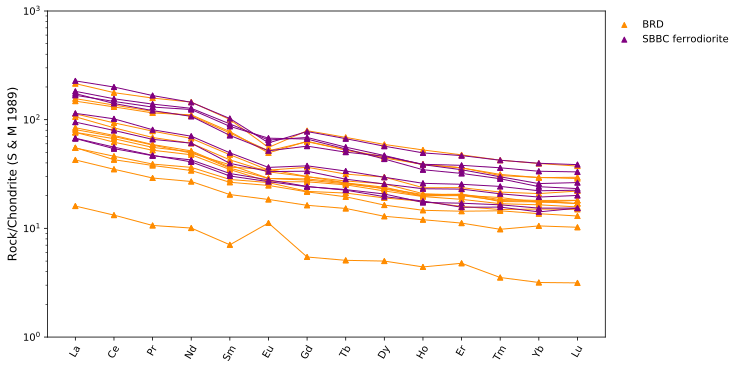

In [5]:
fig, ax = plt.subplots(1, figsize = (10, 6))

BB_REE_plot = pyroplot(whole_rock_geochem_BB)
SB_REE_plot = pyroplot(whole_rock_geochem_SB)
IR_REE_plot = pyroplot(whole_rock_geochem_IR)
Ke_REE_plot = pyroplot(whole_rock_geochem_Ke)

ax = BB_REE_plot.spider(ax=ax, mode = 'plot', color = 'darkorange', marker = '^', label = 'BRD')
ax = SB_REE_plot.spider(ax=ax, mode = 'plot', color = 'purple', marker = '^', label = 'SBBC ferrodiorite')

ax.set_ylim(1, 1000)
ax.set_ylabel('Rock/Chondrite (S & M 1989)')
plt.legend()
plt.show(fig)

## REE comparison between Greenstone Flow on Keweenaw Peninsula and Isle Royale

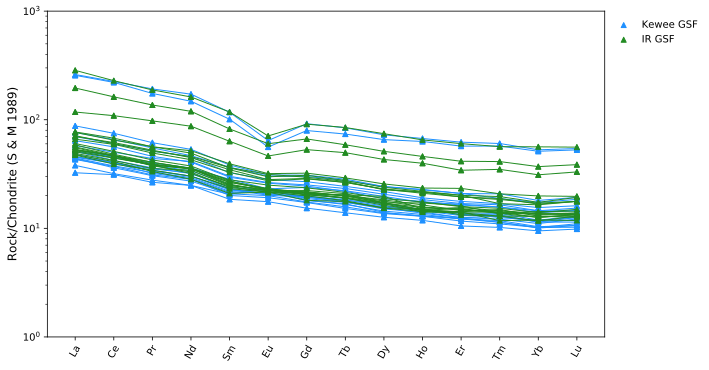

In [6]:
fig, ax = plt.subplots(1, figsize = (10, 6))

ax = Ke_REE_plot.spider(ax=ax, mode = 'plot', color = 'dodgerblue', marker = '^', label = 'Kewee GSF')
ax = IR_REE_plot.spider(ax=ax, mode = 'plot', color = 'forestgreen', marker = '^', label = 'IR GSF')

ax.set_ylim(1, 1000)
ax.set_ylabel('Rock/Chondrite (S & M 1989)')
plt.legend()
plt.show(fig)

## REE plot from anorthosite xenoliths from Morrison et al., (1983)

Data are from Morrison, D. A., Ashwal, L. D., Phinney, W. C., Shih, C. Y., & Wooden, J. L. (1983). Pre-Keweenawan anorthosite inclusions in the Keweenawan Beaver Bay and Duluth complexes, northeastern Minnesota. Geological Society of America Bulletin, 94(2), 206-221.

In [49]:
Morrison_REE = pd.read_csv('../data/Geochem_new/AX_REE.csv')
Morrison_REE = Morrison_REE[Morrison_REE['texture'] != 'host']
Morrison_REE = Morrison_REE[~Morrison_REE['sample'].str.contains('px')]
Morrison_REE = Morrison_REE.pyrochem.REE.pyrochem.normalize_to(CI, units="ppm")
Morrison_REE.head()

,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu
0,7.763713,5.065359,NaN,3.211991,2.026144,7.931034,NaN,1.604278,NaN,NaN,NaN,NaN,1.176471,1.181102
1,7.805907,5.555556,NaN,2.569593,1.568627,9.655172,NaN,0.534759,NaN,NaN,NaN,NaN,0.003529,0.031496
3,16.962025,12.908497,NaN,8.565310,5.294118,11.724138,NaN,3.208556,NaN,NaN,NaN,NaN,1.411765,1.574803
4,8.312236,5.555556,NaN,2.141328,1.503268,9.827586,NaN,0.534759,NaN,NaN,NaN,NaN,0.176471,0.133858
5,10.928270,9.052288,NaN,5.653105,3.202614,9.482759,NaN,2.139037,NaN,NaN,NaN,NaN,1.058824,9.448819


In [50]:
Morrison_REE = Morrison_REE[['La', 'Ce', 'Nd', 'Sm','Eu', 'Tb', 'Yb', 'Lu']]

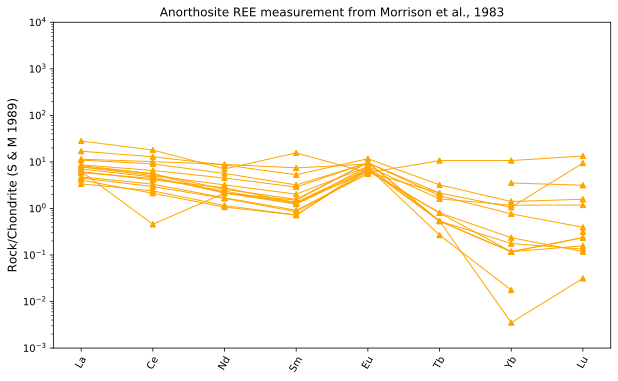

In [51]:
fig, ax = plt.subplots(1, figsize = (10, 6))

AX_REE_plot = pyroplot(Morrison_REE)

ax = AX_REE_plot.spider(ax=ax, mode = 'plot', color = 'orange', marker = '^', label = 'Anorthosite REE (Morrison et al., 1983)')

ax.set_ylim(0.001, 10000)
ax.set_ylabel('Rock/Chondrite (S & M 1989)')
plt.title('Anorthosite REE measurement from Morrison et al., 1983')
plt.savefig('code_output/geochem/Morrison_AX_REE.pdf')
plt.show(fig)

**We can see a positive Eu anomaly in the plagioclase!**

## REE plot from zircons extracted from anorthosite xenolith MS99033 in this study

**Note that the zircons used for geochemistry study are not the same as those used for CA-ID-TIMS geochronology work. However, both zircon morphologies were examined (subhedral to anhedral crystals and platy fragments).**

In [9]:
AX_zircon_REE = pd.read_csv('../data/Geochem_new/AX_zircon_REE.csv')
AX_zircon_REE = AX_zircon_REE.pyrochem.REE.pyrochem.normalize_to(CI, units="ppm")
AX_zircon_REE.head()

,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu
0,0.413502,24.509804,7.915789,25.053533,122.222222,3.431034,486.131387,887.700535,1484.251969,2349.823322,3359.516616,4352.941176,5529.411765,5511.811024
1,0.409283,11.421569,7.294737,20.000000,106.535948,2.637931,344.038929,596.256684,929.133858,1372.791519,1800.604230,2337.254902,2764.705882,2669.291339
2,0.485232,17.973856,7.789474,25.910064,120.915033,2.655172,564.476886,1010.695187,1767.716535,2879.858657,3951.661631,5019.607843,6058.823529,6299.212598
3,0.050633,9.624183,1.210526,4.689507,38.562092,0.482759,199.026764,403.743316,708.661417,1181.978799,1697.885196,2329.411765,3000.000000,3145.669291
4,NaN,10.441176,0.536842,2.548180,24.575163,0.172414,154.744526,326.203209,618.110236,1035.335689,1583.081571,2235.294118,2935.294118,3169.291339


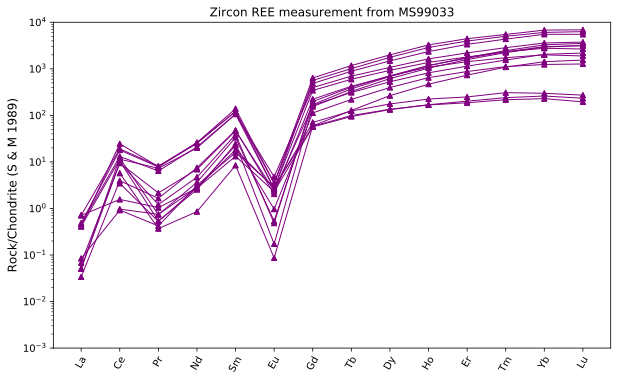

In [39]:
fig, ax = plt.subplots(1, figsize = (10, 6))

AX_zircon_REE_plot = pyroplot(AX_zircon_REE)

ax = AX_zircon_REE_plot.spider(ax=ax, mode = 'plot', color = 'purple', marker = '^', label = 'Anorthosite zircon REE (This Study)')

ax.set_ylim(0.001, 10000)
ax.set_ylabel('Rock/Chondrite (S & M 1989)')
plt.title('Zircon REE measurement from MS99033')
plt.savefig('code_output/geochem/AX_zircon_REE.pdf')
plt.show(fig)

**We can see a strorng negative anomaly of Eu concentration in all zircons analyzed, consistent with having the zircons crystallized from a residual liquid after significant plagioclase crystallization.**

## Calculate Ti-in-zircon temperatures from zircons

$log(Ti) = (6.01 \pm 0.03) -  \frac{5080}{T(K)}$

where Ti is in ppm and temperature is in Kelvin
Watson, E. B., & Harrison, T. M. (2005). Zircon thermometer reveals minimum melting conditions on earliest Earth. Science, 308(5723), 841-844.

In [62]:
def get_temp_from_Ti(Ti_ppm):
    # this simple function takes in Ti concentration in zircon (ppm) and returns the Ti-in-zircon temperature in Celcius
    return round(4800/(5.711 - np.log10(Ti_ppm)-np.log10(1)+np.log10(0.7))-273.15,1)

In [63]:
AX_zircon_geochem = pd.read_csv('../data/Geochem_new/AX_zircon_REE.csv')
AX_zircon_Ti = np.mean(AX_zircon_geochem['Ti'])
print('The average Ti concentration in 15 zircons is:', round(AX_zircon_Ti,1), 'ppm')

The average Ti concentration in 15 zircons is: 41.6 ppm


In [65]:
get_temp_from_Ti(AX_zircon_Ti)

945.9

**The Ti-in-zircon thermometer gives about zircon crystallization temperature of 1150 degree K, which corresponds to a 900 degree C temperature.**

## Enstatite content comparison in clinopyroxene

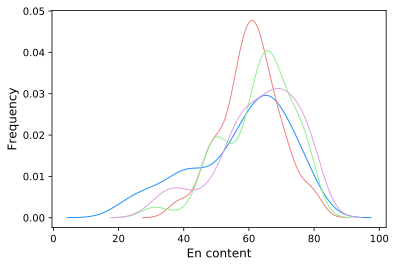

In [13]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
En_ax = sns.distplot(cpx_cat_SBBC.En.tolist(), bins = bins, hist=False, kde = True, color = 'dodgerblue', hist_kws={"alpha": 0.5})
En_ax = sns.distplot(cpx_cat_NBBC.En.tolist(), bins = bins, hist=False, kde = True, color = 'lightcoral', ax = En_ax, hist_kws={"alpha": 0.5})
En_ax = sns.distplot(cpx_cat_Keweenaw.En.tolist(), bins = bins, hist=False, kde = True, color = 'lightgreen', ax = En_ax, hist_kws={"alpha": 0.5})
En_ax = sns.distplot(cpx_cat_IR.En.tolist(), bins = bins, hist=False, kde = True, color = 'plum', ax = En_ax, hist_kws={"alpha": 0.5})
# En_ax.set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# En_ax.set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90])
En_ax.set_xlabel('En content')
En_ax.set_ylabel('Frequency')
plt.show(En_ax)

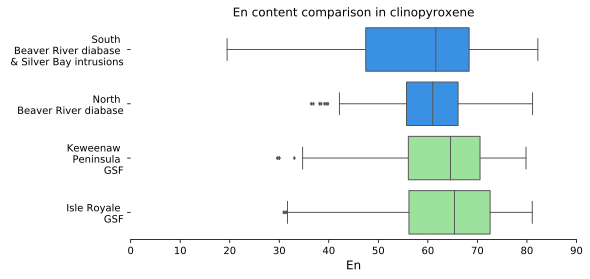

In [14]:
# sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8,4))

ax = sns.boxplot(x="En", y="Location", data=cpx_cat,fliersize=2, width=0.8,
            palette=['dodgerblue','dodgerblue','lightgreen','lightgreen'])

ax.set(ylabel="")
ax.set_xlim(0, 90)
ax.set_yticklabels(['South \n Beaver River diabase \n & Silver Bay intrusions', 'North \n Beaver River diabase',  'Keweenaw \n Peninsula \n GSF', 'Isle Royale \n GSF'])
for tick in ax.yaxis.get_major_ticks():

    tick.label1.set_horizontalalignment('right')
sns.despine(trim=True, left=True)
plt.title('En content comparison in clinopyroxene')
# plt.savefig('code_output/geochem/En_px_comparison.pdf', bbox_inches='tight')
plt.show()

## Forsterite content comparison in olivine

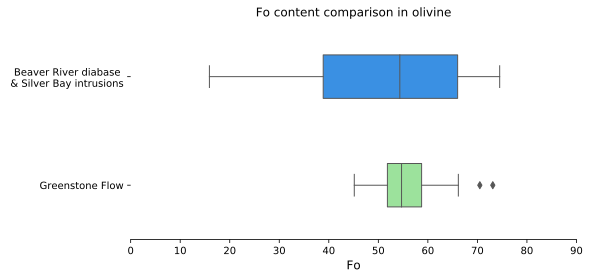

In [15]:
# sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8,4))

sns.boxplot(x="Fo", y="Unit", data=ol_cat, width=0.4,
             palette=['dodgerblue','lightgreen'])

ax.set(ylabel="")
ax.set_xlim(0, 90)
ax.set_yticklabels([ 'Beaver River diabase \n & Silver Bay intrusions', 'Greenstone Flow',])
sns.despine(trim=True, left=True)
plt.title('Fo content comparison in olivine')
# plt.savefig('code_output/geochem/Fo_ol_comparison.pdf', bbox_inches='tight')
plt.show()

In [16]:
cpx_cat.head()

,Sample,CAT SUM,Si,Al,Na,Ca,Cr,Fe,Mg,K,Ti,Mn,Total,Mg#,Location,En
0,SBI10-CPX-1,2.28,2.00,0.05,0.02,0.65,0.0,0.54,0.67,0.0,0.02,0.01,3.97,55.4,South BBC,55.371901
1,SBI10-CPX-2,2.24,2.00,0.05,0.02,0.72,0.0,0.38,0.76,0.0,0.03,0.01,3.96,66.6,South BBC,66.666667
2,SBI10-CPX-3,2.27,2.02,0.04,0.02,0.71,0.0,0.48,0.65,0.0,0.02,0.01,3.95,57.3,South BBC,57.522124
3,SBI10-CPX-4,2.27,1.99,0.06,0.02,0.68,0.0,0.47,0.71,0.0,0.03,0.01,3.97,60.3,South BBC,60.169492
4,SBI10-CPX-5,2.25,1.98,0.08,0.02,0.69,0.0,0.41,0.75,0.0,0.03,0.01,3.96,64.7,South BBC,64.655172


## Anorthite comparison in plagioclase (by unit)

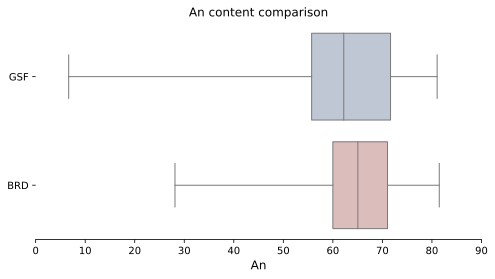

In [17]:
# sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(x="An", y="Unit", data=pl_cat,
            whis=[0, 100], palette="vlag")

ax.set(ylabel="")
ax.set_xlim(0, 90)
sns.despine(trim=True, left=True)
plt.title('An content comparison')
plt.show()

## Anorthite comparison in plagioclase (by location in xenoliths)

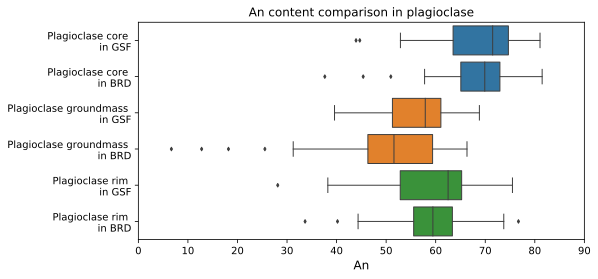

In [18]:
pl_cat = pl_cat.sort_values('loc')
# sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(x="An", y="Megacryst_loc", data=pl_cat,fliersize=2.5,
            palette=['C0', 'C0', 'C1','C1', 'C2','C2'])

ax.set(ylabel="")
ax.set_xlim(0, 90)
ax.set_yticklabels(['Plagioclase core \n in GSF', 'Plagioclase core \n in BRD', 'Plagioclase groundmass \n in GSF', 'Plagioclase groundmass \n in BRD', 'Plagioclase rim \n in GSF', 'Plagioclase rim \n in BRD'])
plt.title('An content comparison in plagioclase')
# plt.savefig('code_output/geochem/An_plag_comparison.pdf', bbox_inches='tight')
plt.show()